# attempting elecferisis analysis with drawn images

### guide

Herein is the work pipeline that I developed to determine the extent of electrotaxis of the organism Physarum Polycephalum. 

Compromises were made within this approach as rather than using stock images with poor contrasts I opted to edit the images with red and green pen, to allow for easy thresholding. The possible errors and preventatives for this were examined in the extended report.

The pipeline has several steps:
1. find cm to pixel conversion factor
2. crop each of the oats into a seperate experiment
3. find the area of physarum growth
4. find the centroid of the oat (selecting red colour channel)
5. find centre of Physarum growth (selecting green colour channel)
6. find the average displacment from the centroid 
7. convert the distances and area to cm
8. repeat for all other images of different voltages



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pims
from skimage import data
from skimage import color, morphology
from IPython.display import Image


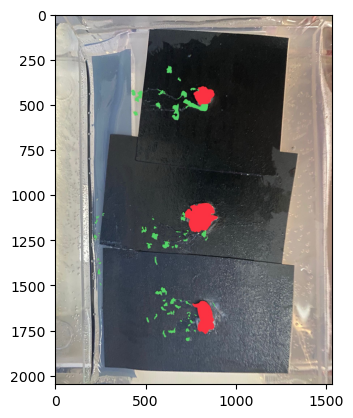

In [ ]:
from PIL import Image, ImageDraw

# File path
file_path = '25v.jpg'

# Open the image
image = Image.open(file_path)
image2 = Image.open('25Velectrophoresis_2nd_run.jpg')
# # Convert the image to RGBA mode
# image = image.convert("RGBA")
plt.imshow(image)



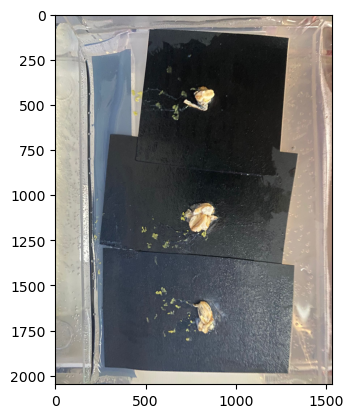

In [ ]:
plt.imshow(image2)

### step 0 find pixel scale factor

(130.33333333333334, 120.0)

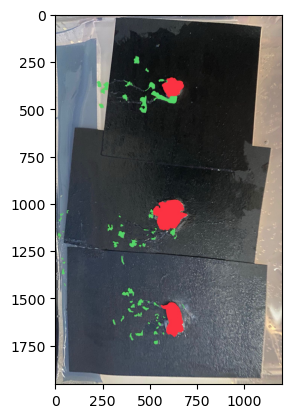

In [ ]:
# Define crop coordinates
# here i know the length = 15cm, width = 10cm therefore the area is 150cm^2
pixel_crop = (200,65,1400,2020)

# Crop the image
cropped_image = image.crop(pixel_crop)

plt.imshow(cropped_image)

#Calculate the dimensions of the cropped image
length_pixels = cropped_image.height
width_pixels = cropped_image.width


length_ratio = length_pixels / 15
width_ratio = width_pixels / 10

# 3. Pixel ratio
pixel_ratio = (length_ratio, width_ratio)

pixel_ratio 

In [ ]:
def pixel_scale(image):
    image

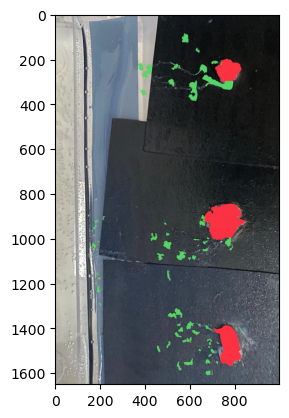

In [ ]:
# Define crop coordinates
left = 50
upper = 200
right = 1050
lower = 1850

# Crop the image
cropped_image = image.crop((left, upper, right, lower))

plt.imshow(cropped_image)

My approach:
- split each growth on each tray into seperate sections,m these can be taken to be individual experiments
- find the centroid of each oat, this can be done using some thresholding
- for each growth find the average distance from the centroid
- record these and plot them 


### step 1 split the image into seperate experiments

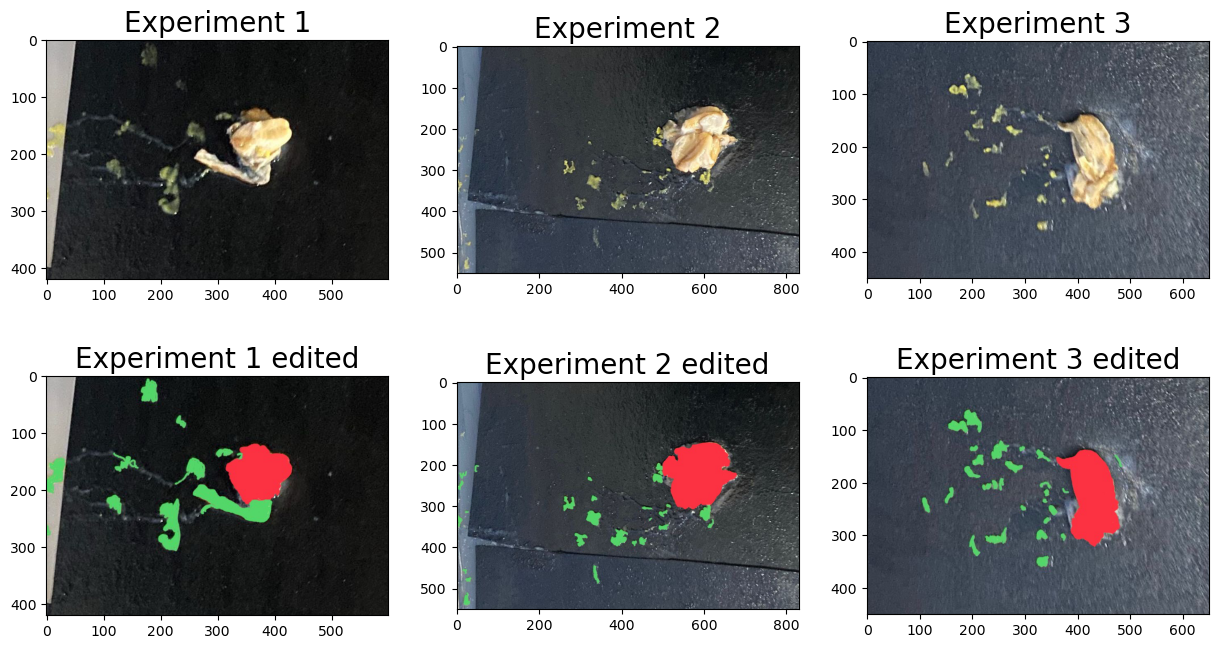

In [ ]:
def split_image(exp_crop):# Crop the image
    cropped_image = image.crop((exp_crop))
    image_array = np.array(cropped_image)
    return cropped_image, image_array

exp1_crop = (450,280,1050,700)
exp2_crop = (220,900,1050,1450)
exp3_crop = (400,1450,1050,1900)
#left,upper,right,down
exp1,exp1_data = split_image(exp1_crop)

exp2,exp2_data = split_image(exp2_crop)

exp3,exp3_data = split_image(exp3_crop)

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Plot exp1
axs[0][0].imshow(image2.crop(exp1_crop))
axs[0][0].set_title('Experiment 1', fontsize = 20)

# Plot exp2
axs[0][1].imshow(image2.crop(exp2_crop))
axs[0][1].set_title('Experiment 2', fontsize = 20)

# Plot exp3
axs[0][2].imshow(image2.crop(exp3_crop))
axs[0][2].set_title('Experiment 3', fontsize = 20)


axs[1][0].imshow(exp1)
axs[1][0].set_title('Experiment 1 edited', fontsize = 20)

# Plot exp2
axs[1][1].imshow(exp2)
axs[1][1].set_title('Experiment 2 edited', fontsize = 20)

# Plot exp3
axs[1][2].imshow(exp3)
axs[1][2].set_title('Experiment 3 edited', fontsize = 20)


plt.show()


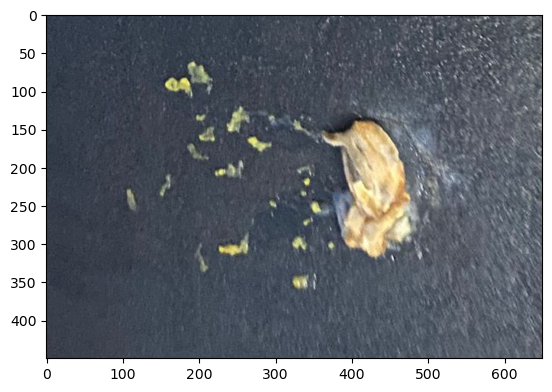

In [ ]:
plt.imshow(image2.crop(exp3_crop))

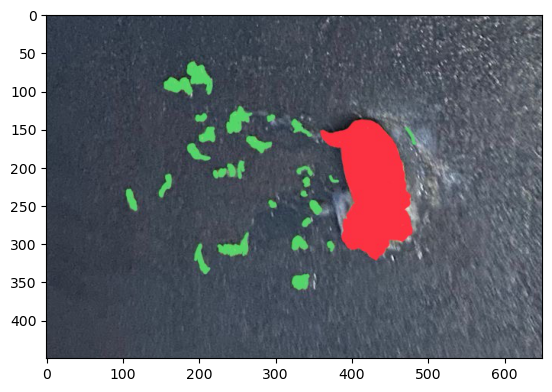

In [ ]:
plt.imshow(exp3)

### step 2 isolate oat, find centroid

In [ ]:
def thresholding(data, threshold,channel):
    colour_channel = data[:,:,channel]
    # Apply the threshold to the blue channel
    thresholded = colour_channel > threshold
    return thresholded

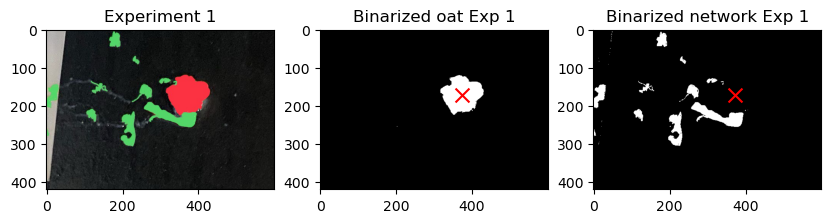

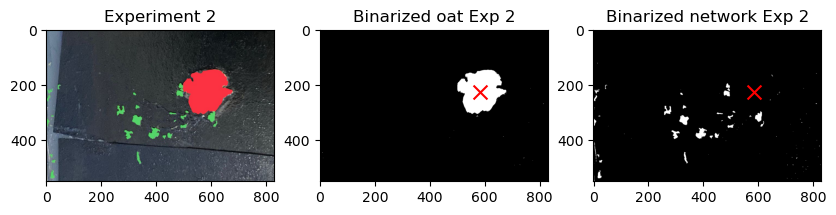

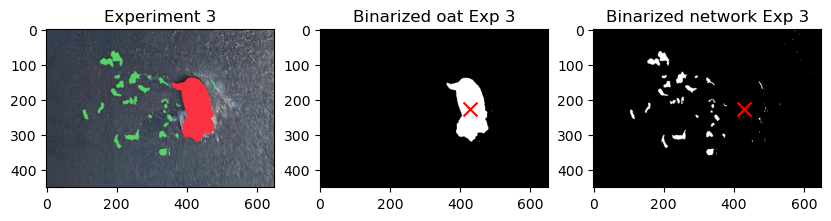

The coordinates of centroid 1 are (372.866641, 171.272302)
The coordinates of centroid 2 are (584.077402, 223.465983)
The coordinates of centroid 3 are (427.794767, 227.029194)


In [ ]:
def find_centroid(exp, exp_data,experiment):
    #find threshold, using only the red channel to isolate the oat
    thresholded = thresholding(exp_data, 230,0)
    thresholded_g = thresholding(exp_data, 195,1)
    white_pixels_y, white_pixels_x = np.where(thresholded)
    centroid_y = np.mean(white_pixels_y)   # Adjust centroid for experiment's coordinates
    centroid_x = np.mean(white_pixels_x)
    # Plotting for visualization
    fig, axs = plt.subplots(1, 3, figsize=(10, 12))

    # Plot the original oat image
    axs[0].imshow(exp)
    axs[0].set_title(f'Experiment {experiment}', fontsize = 12)

    # Plot the binarized oat image
    axs[1].imshow(thresholded, cmap='gray')
    axs[1].set_title(f'Binarized oat Exp {experiment}', fontsize = 12)

    # Plot the centroid
    axs[1].scatter(np.mean(white_pixels_x), np.mean(white_pixels_y), color='red', marker='x', s=100)

    axs[2].imshow(thresholded_g, cmap='gray')
    axs[2].set_title(f'Binarized network Exp {experiment}', fontsize = 12)
    axs[2].scatter(np.mean(white_pixels_x), np.mean(white_pixels_y), color='red', marker='x', s=100,cmap='viridis')

    plt.show()

    return (centroid_x, centroid_y)
    #fig, axs = plt.subplots(1, 2, figsize=(10, 5))
   
   
exp1_centroid = find_centroid(exp1, exp1_data, experiment=1)
exp2_centroid = find_centroid(exp2, exp2_data, experiment=2)
exp3_centroid = find_centroid(exp3, exp3_data, experiment=3)
print("The coordinates of centroid 1 are (%f, %f)" % (exp1_centroid[0], exp1_centroid[1]))
print("The coordinates of centroid 2 are (%f, %f)" % (exp2_centroid[0], exp2_centroid[1]))
print("The coordinates of centroid 3 are (%f, %f)" % (exp3_centroid[0], exp3_centroid[1]))


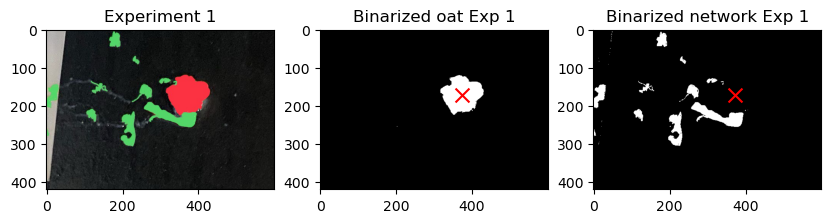

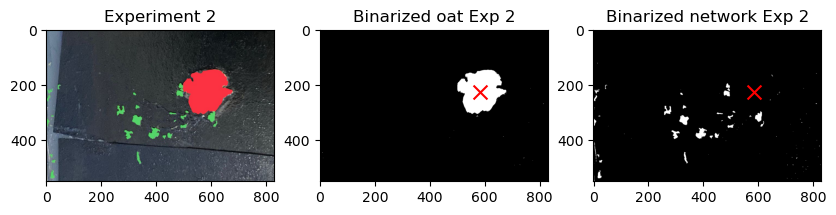

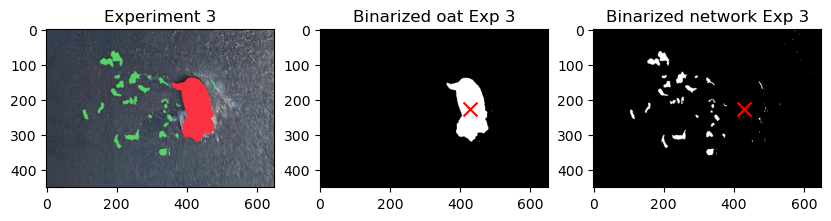

The coordinates of centroid 1 are (372.866641, 171.272302)
The coordinates of centroid 2 are (584.077402, 223.465983)
The coordinates of centroid 3 are (427.794767, 227.029194)


In [ ]:
def find_centroid(exp, exp_data, experiment):
    # Find threshold, using only the red channel to isolate the oat
    thresholded = thresholding(exp_data, 230, 0)
    thresholded_g = thresholding(exp_data, 195, 1)
    white_pixels_y, white_pixels_x = np.where(thresholded)
    centroid_y = np.mean(white_pixels_y)   # Adjust centroid for experiment's coordinates
    centroid_x = np.mean(white_pixels_x)
    
    # Plotting for visualization
    fig, axs = plt.subplots(1, 3, figsize=(10, 12))

    # Plot the original oat image
    axs[0].imshow(exp)
    axs[0].set_title(f'Experiment {experiment}', fontsize=12)

    # Plot the binarized oat image
    axs[1].imshow(thresholded, cmap='gray')
    axs[1].set_title(f'Binarized oat Exp {experiment}', fontsize=12)

    # Plot the centroid on the binarized oat image
    axs[1].scatter(centroid_x, centroid_y, color='red', marker='x', s=100)

    # Plot the binarized network
    axs[2].imshow(thresholded_g, cmap='gray')
    axs[2].set_title(f'Binarized network Exp {experiment}', fontsize=12)

    # Plot the centroid on the binarized network
    axs[2].scatter(centroid_x, centroid_y, color='red', marker='x', s=100)

    plt.show()

    return centroid_x, centroid_y

exp1_centroid = find_centroid(exp1, exp1_data, experiment=1)
exp2_centroid = find_centroid(exp2, exp2_data, experiment=2)
exp3_centroid = find_centroid(exp3, exp3_data, experiment=3)

print("The coordinates of centroid 1 are (%f, %f)" % (exp1_centroid[0], exp1_centroid[1]))
print("The coordinates of centroid 2 are (%f, %f)" % (exp2_centroid[0], exp2_centroid[1]))
print("The coordinates of centroid 3 are (%f, %f)" % (exp3_centroid[0], exp3_centroid[1]))


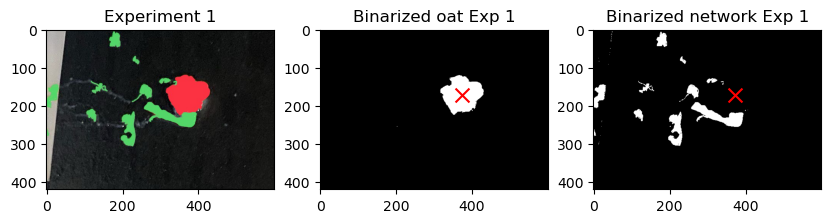

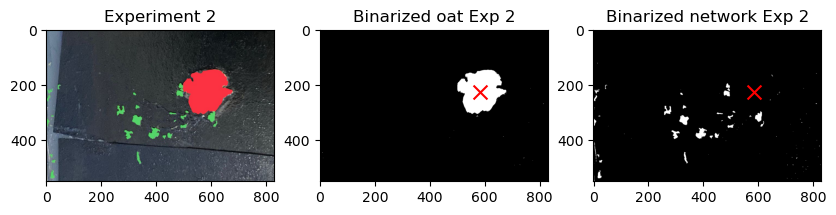

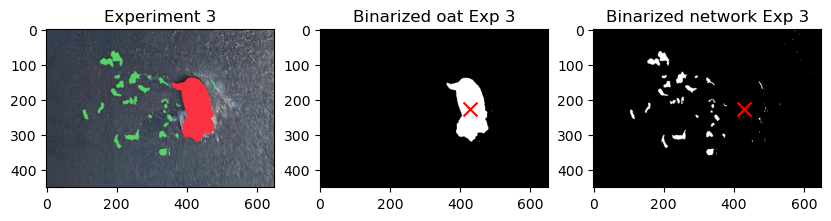

The coordinates of centroid 1 are (372.866641, 171.272302)
The coordinates of centroid 2 are (584.077402, 223.465983)
The coordinates of centroid 3 are (427.794767, 227.029194)


In [ ]:
def find_centroid(exp, exp_data, experiment):
    # Find threshold, using only the red channel to isolate the oat
    thresholded = thresholding(exp_data, 230, 0)
    thresholded_g = thresholding(exp_data, 195, 1)
    white_pixels_y, white_pixels_x = np.where(thresholded)
    centroid_y = np.mean(white_pixels_y)   # Adjust centroid for experiment's coordinates
    centroid_x = np.mean(white_pixels_x)
    
    # Plotting for visualization
    fig, axs = plt.subplots(1, 3, figsize=(10, 12))

    # Plot the original oat image
    axs[0].imshow(exp)
    axs[0].set_title(f'Experiment {experiment}', fontsize=12)

    # Plot the binarized oat image
    axs[1].imshow(thresholded, cmap='gray')
    axs[1].set_title(f'Binarized oat Exp {experiment}', fontsize=12)

    # Plot the centroid on the binarized oat image
    axs[1].scatter(centroid_x, centroid_y, color='red', marker='x', s=100)

    # Plot the binarized network
    axs[2].imshow(thresholded_g, cmap='gray')
    axs[2].set_title(f'Binarized network Exp {experiment}', fontsize=12)

    # Plot the centroid on the binarized network
    axs[2].scatter(centroid_x, centroid_y, color='red', marker='x', s=100)

    plt.show()

    return centroid_x, centroid_y

exp1_centroid = find_centroid(exp1, exp1_data, experiment=1)
exp2_centroid = find_centroid(exp2, exp2_data, experiment=2)
exp3_centroid = find_centroid(exp3, exp3_data, experiment=3)

print("The coordinates of centroid 1 are (%f, %f)" % (exp1_centroid[0], exp1_centroid[1]))
print("The coordinates of centroid 2 are (%f, %f)" % (exp2_centroid[0], exp2_centroid[1]))
print("The coordinates of centroid 3 are (%f, %f)" % (exp3_centroid[0], exp3_centroid[1]))


### step 3 isolate green elements

In [ ]:
def find_growth(exp_data):

    thresholded = thresholding(exp_data, 200, 1)
    
    # # Exclude pixels with values above 150 in all color channels e.g bright white
    # above_threshold = np.all(exp_data <= 200, axis=2)
    # thresholded[above_threshold] = False
    
    return thresholded

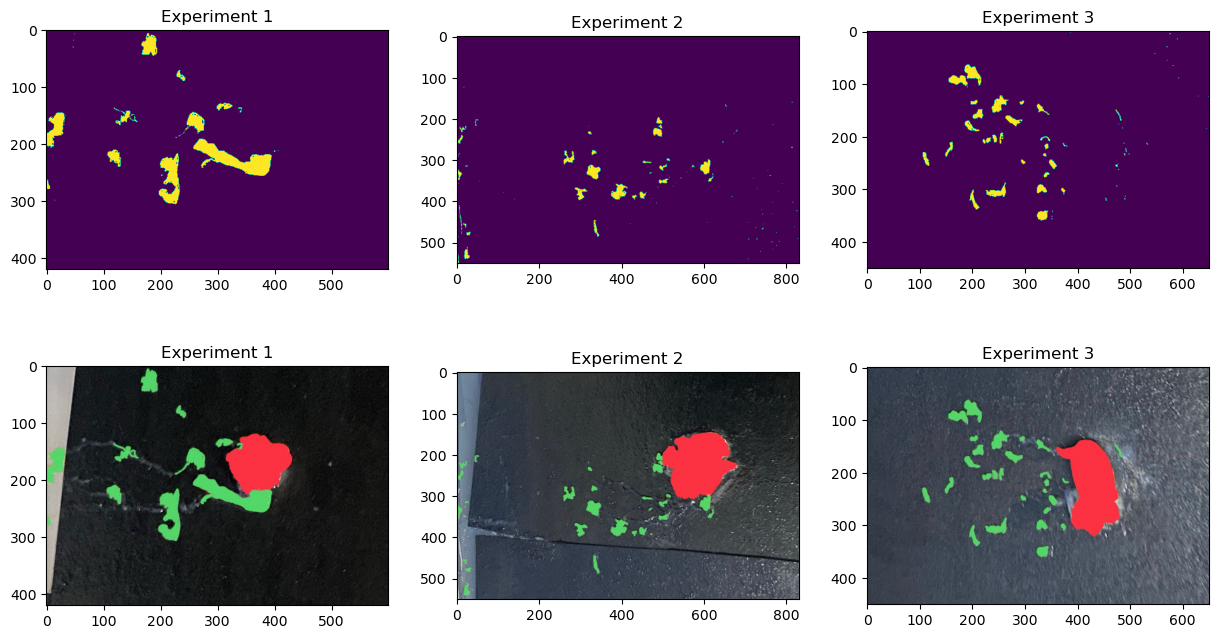

In [ ]:
#save the img's w only the slime 
exp1_green, exp2_green, exp3_green = find_growth(exp1_data), find_growth(exp2_data), find_growth(exp3_data)


fig, axs = plt.subplots(2, 3, figsize=(15, 8))

axs[0][0].imshow(exp1_green)
axs[0][0].set_title('Experiment 1')

# Plot exp2
axs[0][1].imshow(exp2_green)
axs[0][1].set_title('Experiment 2')

# Plot exp3
axs[0][2].imshow(exp3_green)
axs[0][2].set_title('Experiment 3')

# Plot the original images
axs[1][0].imshow(exp1)
axs[1][0].set_title('Experiment 1')

axs[1][1].imshow(exp2)
axs[1][1].set_title('Experiment 2')

axs[1][2].imshow(exp3)
axs[1][2].set_title('Experiment 3')

plt.show()


In [ ]:
# fig, axs = plt.subplots(1, 3, figsize=(15, 8))
# axs[0][0].imshow(exp1_green)
# axs[0][0].set_title('Experiment 1')

# # Plot exp2
# axs[0][1].imshow(exp2_green)
# axs[0][1].set_title('Experiment 2')

# # Plot exp3
# axs[0][2].imshow(exp3_green)
# axs[0][2].set_title('Experiment 3')

### step 4: find area covered

In [ ]:
exp1_pixel, exp2_pixel, exp3_pixel=  np.count_nonzero(exp1_green), np.count_nonzero(exp2_green), np.count_nonzero(exp3_green)

print("Experiment 1 has %d pixels" % (exp1_pixel))
print("Experiment 2 has %d pixels" % (exp2_pixel))
print("Experiment 3 has %d pixels" % (exp3_pixel))


Experiment 1 has 9023 pixels
Experiment 2 has 5703 pixels
Experiment 3 has 5085 pixels


In [ ]:
area_exp1_cm2 = np.count_nonzero(exp1_green) / (pixel_ratio[0] * pixel_ratio[1])
area_exp2_cm2 = np.count_nonzero(exp2_green) / (pixel_ratio[0] * pixel_ratio[1])
area_exp3_cm2 = np.count_nonzero(exp3_green) / (pixel_ratio[0] * pixel_ratio[1])

print("Experiment 1 covers an area of %.2f square centimeters" % area_exp1_cm2)
print("Experiment 2 covers an area of %.2f square centimeters" % area_exp2_cm2)
print("Experiment 3 covers an area of %.2f square centimeters" % area_exp3_cm2)

Experiment 1 covers an area of 0.58 square centimeters
Experiment 2 covers an area of 0.36 square centimeters
Experiment 3 covers an area of 0.33 square centimeters


### step 5 calculate average distance of pixels from centroid

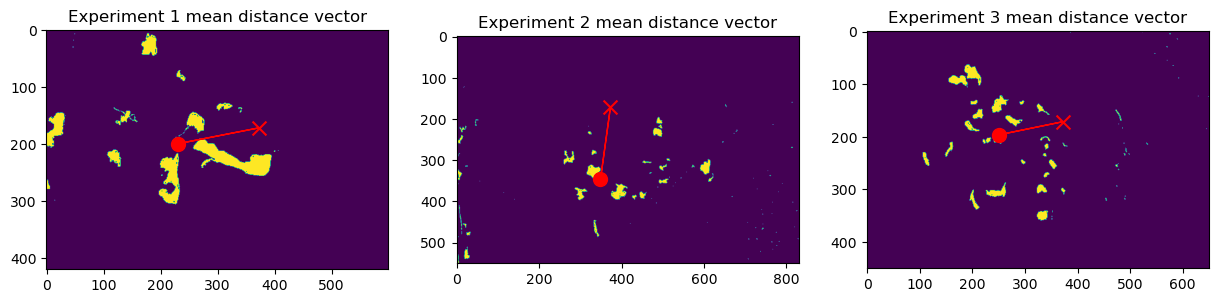

In Pixels Experiment 1 has mean X change of -143.039865 left and mean y change of 28.030258 upwards and a magnitude of 143.137812
In Pixels Experiment 2 has mean X change of -24.228380 left and mean y change of 175.390857 upwards and a magnitude of 27.611687
In Pixels Experiment 3 has mean X change of -122.862118 left and mean y change of 25.215603 upwards and a magnitude of 122.964692
388.1169779795993 556.2123474257791 280.1505000621917


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def distances_from_centroid_subplot(ax, exp_green, centroid, experiment):
    # Find the coordinates of all true points (white pixels) in the binarized image
    white_pixels_y, white_pixels_x = np.nonzero(exp_green)

    # Calculate the distances from each true point to the centroid
    distances = np.sqrt((centroid[0] - white_pixels_x)**2 + (centroid[1] - white_pixels_y)**2)

    # Adjust the sign of distances based on the relative position to the centroid
    signed_distances = distances.copy()
    for i, (x, _) in enumerate(zip(white_pixels_x, white_pixels_y)):
        if x > centroid[0]:
            signed_distances[i] *= -1

    # Calculate the mean distance vector from the centroid
    mean_distance_vector = np.mean(np.array([(x - centroid[0], y - centroid[1]) for x, y in zip(white_pixels_x, white_pixels_y)]), axis=0)
    ax.set_title('Experiment ' + str(experiment)+' mean distance vector')
    ax.imshow(exp_green)

    # Plot an arrow representing the mean distance vector from the centroid
    ax.arrow(centroid[0], centroid[1], mean_distance_vector[0], mean_distance_vector[1], color='red', width=0.1)
    ax.scatter(centroid[0], centroid[1], color='red', marker='x', s=100)
    ax.scatter(centroid[0] + mean_distance_vector[0], centroid[1] + mean_distance_vector[1], color='red', s=100)
    
    max_distance = np.max(distances)
    return signed_distances, mean_distance_vector, max_distance

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Assuming you have the binarized images 'exp1_green', 'exp2_green', 'exp3_green'
# and the centroid coordinates 'exp1_centroid', 'exp2_centroid', 'exp3_centroid'
exp1_distances, mean_distance_vector_1, max_distance1 = distances_from_centroid_subplot(axs[0], exp1_green, exp1_centroid, experiment =1)
exp2_distances, mean_distance_vector_2, max_distance2 = distances_from_centroid_subplot(axs[1], exp2_green, exp2_centroid, experiment =2)
exp3_distances, mean_distance_vector_3, max_distance3 = distances_from_centroid_subplot(axs[2], exp3_green, exp3_centroid, experiment =3)

plt.show()

print("In Pixels Experiment 1 has mean X change of %f left and mean y change of %f upwards and a magnitude of %f" % (mean_distance_vector_1[0], mean_distance_vector_1[1], np.sqrt(mean_distance_vector_1[0]**2 + mean_distance_vector_1[1])))
print("In Pixels Experiment 2 has mean X change of %f left and mean y change of %f upwards and a magnitude of %f" % (mean_distance_vector_2[0], mean_distance_vector_2[1],np.sqrt(mean_distance_vector_2[0]**2 + mean_distance_vector_2[1])))
print("In Pixels Experiment 3 has mean X change of %f left and mean y change of %f upwards and a magnitude of %f" % (mean_distance_vector_3[0], mean_distance_vector_3[1],np.sqrt(mean_distance_vector_3[0]**2 + mean_distance_vector_3[1])))
# print("Experiment 2 has %d pixels" % (np.count_nonzero(exp2_green)))
# print("Experiment 3 has %d pixels" % (np.count_nonzero(exp3_green)))
# print(mean_distance_vector_1, mean_distance_vector_2, mean_distance_vector_3)
print(max_distance1,max_distance2, max_distance3)

388.1169779795993


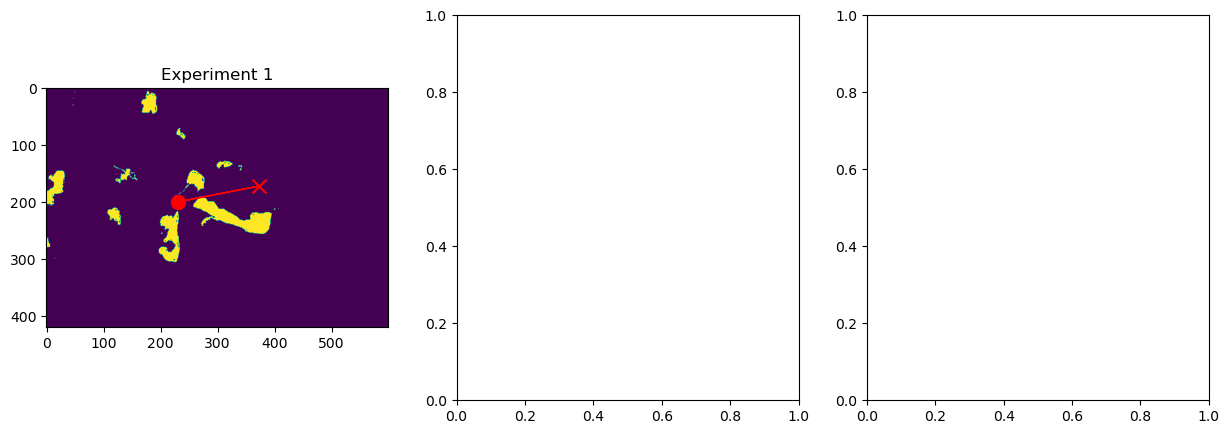

In [ ]:
# def distances_from_centroid_subplot(ax, exp_green, centroid, experiment):
#     # Find the coordinates of all true points (white pixels) in the binarized image
#     white_pixels_y, white_pixels_x = np.nonzero(exp_green)

#     # Calculate the distances from each true point to the centroid
#     distances = np.sqrt((centroid[0] - white_pixels_x)**2 + (centroid[1] - white_pixels_y)**2)

#     #adjust the sign of distances based on the relative position to the centroid
#     signed_distances = distances.copy()
#     for i, (x, _) in enumerate(zip(white_pixels_x, white_pixels_y)):
#         if x > centroid[0]:
#             signed_distances[i] *= -1

#     #Calculate the mean distance vector from the centroid
#     mean_distance_vector = np.mean(np.array([(x - centroid[0], y - centroid[1]) for x, y in zip(white_pixels_x, white_pixels_y)]), axis=0)
#     ax.set_title('Experiment ' + str(experiment))
#     ax.imshow(exp_green)

#     # Plot an arrow representing the mean distance vector from the centroid
#     ax.arrow(centroid[0], centroid[1], mean_distance_vector[0], mean_distance_vector[1], color='red', width=0.1)
#     ax.scatter(centroid[0], centroid[1], color='red', marker='x', s=100)
#     ax.scatter(centroid[0] + mean_distance_vector[0], centroid[1] + mean_distance_vector[1], color='red', s=100)
#     max_distance = np.max(distances)

#     return signed_distances, mean_distance_vector, max_distance

# # Create subplots
# fig, axs = plt.subplots(1, 3, figsize=(15, 5))


# exp1_distances, mean_distance_vector_1, max_distance_1 = distances_from_centroid_subplot(axs[0], exp1_green, exp1_centroid, experiment=1)
# print(max_distance_1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def furthest_point_from_centroid_x(exp_green, centroid):
    # Find the coordinates of all true points (white pixels) in the binarized image
    white_pixels_y, white_pixels_x = np.nonzero(exp_green)

    # Calculate the distances along the x-direction from each true point to the centroid
    distances_x = np.abs(white_pixels_x - centroid[0])

    # Find the index of the point with the maximum distance along the x-direction
    furthest_idx = np.argmax(distances_x)
    
    # Find the coordinates of the point with the maximum distance along the x-direction
    furthest_coord_x = white_pixels_x[furthest_idx]

    return furthest_coord_x

# Example usage:
# Assuming you have the binarized image 'exp1_green' and the centroid coordinate 'exp1_centroid'
furthest_x_exp1 = furthest_point_from_centroid_x(exp1_green, exp1_centroid)
print("Furthest x-coordinate from centroid for Experiment 1:", furthest_x_exp1)


Furthest x-coordinate from centroid for Experiment 1: 0


In [ ]:
import numpy as np

def furthest_point_from_centroid_x(exp_green, centroid):
    # Find the coordinates of all true points (white pixels) in the binarized image
    white_pixels_y, white_pixels_x = np.nonzero(exp_green)

    if len(white_pixels_x) == 0:
        return None  # Return None if there are no white pixels
    
    # Calculate the x-coordinate of the furthest point along the x-direction from the centroid
    furthest_x = np.max(np.abs(white_pixels_x - centroid[0]))

    return furthest_x

def pixel_to_cm(x_distance):
    x_dist = x_distance / pixel_ratio[0]
    #magnitude = np.sqrt(x_dist**2 +y_dist**2)
    return x_dist

# Example usage:
# Assuming you have the binarized image 'exp1_green' and the centroid coordinate 'exp1_centroid'
furthest_x_exp1 = furthest_point_from_centroid_x(exp1_green, exp1_centroid)
furthest_x_exp2 = furthest_point_from_centroid_x(exp2_green, exp2_centroid)
furthest_x_exp3 = furthest_point_from_centroid_x(exp3_green, exp3_centroid)

furthest_xcm_exp1 = pixel_to_cm(furthest_x_exp1)
furthest_xcm_exp2 = pixel_to_cm(furthest_x_exp2)
furthest_xcm_exp3 = pixel_to_cm(furthest_x_exp3)

print(furthest_x_exp1, furthest_xcm_exp1)
print(furthest_x_exp2, furthest_xcm_exp2)
print(furthest_x_exp3, furthest_xcm_exp3)


372.8666406960135 2.8608693659540676
584.0774021352313 4.481412292597682
321.7947674882348 2.469013561290804


### final convert to cm

In [ ]:
def pixel_to_cm(mean_distance_vector):
    x_dist = mean_distance_vector[0] / pixel_ratio[0]
    y_dist = mean_distance_vector[1] / pixel_ratio[1]
    magnitude = np.sqrt(x_dist**2 +y_dist**2)
    return x_dist, y_dist, magnitude

exp1_x_cm,exp1_y_cm, exp_1_mag_cm = pixel_to_cm(mean_distance_vector_1)
exp2_x_cm,exp2_y_cm, exp_2_mag_cm = pixel_to_cm(mean_distance_vector_2)
exp3_x_cm,exp3_y_cm, exp_3_mag_cm = pixel_to_cm(mean_distance_vector_3)

print("Experiment 1 has mean X change of %f left and mean y change of %f upwards and a magnitude of %f in cm" % (exp1_x_cm,exp1_y_cm, exp_1_mag_cm))
print("Experiment 2 has mean X change of %f left and mean y change of %f upwards and a magnitude of %f in cm" % (exp2_x_cm,exp2_y_cm, exp_2_mag_cm ))
print("Experiment 3 has mean X change of %f left and mean y change of %f upwards and a magnitude of %f in cm" % (exp3_x_cm,exp3_y_cm, exp_3_mag_cm ))


Experiment 1 has mean X change of -1.097493 left and mean y change of 0.233585 upwards and a magnitude of 1.122075 in cm
Experiment 2 has mean X change of -1.806438 left and mean y change of 1.026643 upwards and a magnitude of 2.077791 in cm
Experiment 3 has mean X change of -1.364120 left and mean y change of -0.254511 upwards and a magnitude of 1.387659 in cm


this is currently in terms of pixels, therefore conversion is needed

In [ ]:
#EASE
exp1_results = exp1_pixel, area_exp1_cm2, mean_distance_vector_1[0], mean_distance_vector_1[1], np.sqrt(mean_distance_vector_1[0]**2 + mean_distance_vector_1[1]**2),exp1_x_cm, exp1_y_cm, exp_1_mag_cm
exp2_results = exp2_pixel, area_exp2_cm2, mean_distance_vector_2[0], mean_distance_vector_2[1], np.sqrt(mean_distance_vector_2[0]**2 + mean_distance_vector_2[1]**2),exp2_x_cm, exp2_y_cm, exp_2_mag_cm
exp3_results = exp3_pixel, area_exp3_cm2, mean_distance_vector_3[0], mean_distance_vector_3[1], np.sqrt(mean_distance_vector_3[0]**2 + mean_distance_vector_3[1]**2),exp3_x_cm, exp3_y_cm, exp_3_mag_cm

print(exp1_results)
print(exp2_results)
print(exp3_results)

(9023, 0.5769181585677748, -143.03986467920618, 28.030257825727567, 145.76041383456064, -1.0974925678711471, 0.23358548188106307, 1.1220749145569617)
(5703, 0.3646419437340153, -235.43914157061099, 123.19717690607403, 265.72379227523584, -1.8064384263729742, 1.0266431408839503, 2.0777911172687524)
(5085, 0.32512787723785164, -177.7902443810757, -30.54128798225971, 180.39440475995352, -1.36411952210544, -0.2545107331854976, 1.387659102191815)


idea for plot, one central point with vectors coming out, in different colours for different voltages

In [ ]:
np.shape(exp1_green)
(exp1_centroid)

(372.8666406960135, 171.2723022984028)

In [ ]:
import numpy as np

def furthest_coords_from_center(arr, center):
    # Calculate the distance of each coordinate from the center point
    distances = np.linalg.norm(arr - center, axis=-1)
    
    # Find the index of the coordinate with the maximum distance
    furthest_idx = np.argmax(distances)
    
    # Convert the 1D index to multi-dimensional indices
    furthest_coords = np.unravel_index(furthest_idx, arr.shape)
    
    return furthest_coords

# Example usage:
# Assuming exp1_green, exp2_green, and exp3_green are your arrays for experiments 1, 2, and 3 respectively
exp1_centroid = (372.8666406960135, 171.2723022984028)  # Centroid for Experiment 1
exp2_centroid = (372.8666406960135, 171.2723022984028)  # Centroid for Experiment 2
exp3_centroid = (372.8666406960135, 171.2723022984028)  # Centroid for Experiment 3

furthest_coords_exp1 = furthest_coords_from_center(exp1_green, exp1_centroid)
furthest_coords_exp2 = furthest_coords_from_center(exp2_green, exp2_centroid)
furthest_coords_exp3 = furthest_coords_from_center(exp3_green, exp3_centroid)

print("Furthest coordinates from center for Experiment 1:", furthest_coords_exp1)
print("Furthest coordinates from center for Experiment 2:", furthest_coords_exp2)
print("Furthest coordinates from center for Experiment 3:", furthest_coords_exp3)


ValueError: operands could not be broadcast together with shapes (420,600) (2,) 

In [ ]:


import numpy as np

def furthest_coords_from_center(arr, center):
    # Calculate the distance of each coordinate from the center point
    distances = np.linalg.norm(arr - np.array(center), axis=-1)
    
    # Find the index of the coordinate with the maximum distance
    furthest_idx = np.argmax(distances)
    
    # Convert the 1D index to multi-dimensional indices
    furthest_coords = np.unravel_index(furthest_idx, arr.shape)
    
    return furthest_coords

furthest_coords_exp1 = furthest_coords_from_center(exp1_green, exp1_centroid)
print(furthest_coords_exp1)

ValueError: operands could not be broadcast together with shapes (420,600) (2,) 